# Importing Libraries

In [2]:
#Importing relevant libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading dataset

In [4]:
#load training data

train_df = pd.read_csv("/content/drive/MyDrive/Airqo/Train.csv",
                       parse_dates=["date"],
                       index_col=["date"])

train_df.head()


,id,site_id,site_latitude,site_longitude,city,country,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
date,,,,,,,,,,,,,,,,,,,,,
2023-10-25,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
2023-11-02,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2023-11-03,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,13,NaN,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
2023-11-08,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
2023-11-09,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,13,0.000267,0.774656,0.000207,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


In [5]:
# To list all columns
columns_list = train_df.columns.tolist()
print(columns_list)

['id', 'site_id', 'site_latitude', 'site_longitude', 'city', 'country', 'hour', 'sulphurdioxide_so2_column_number_density', 'sulphurdioxide_so2_column_number_density_amf', 'sulphurdioxide_so2_slant_column_number_density', 'sulphurdioxide_cloud_fraction', 'sulphurdioxide_sensor_azimuth_angle', 'sulphurdioxide_sensor_zenith_angle', 'sulphurdioxide_solar_azimuth_angle', 'sulphurdioxide_solar_zenith_angle', 'sulphurdioxide_so2_column_number_density_15km', 'month', 'carbonmonoxide_co_column_number_density', 'carbonmonoxide_h2o_column_number_density', 'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude', 'carbonmonoxide_sensor_azimuth_angle', 'carbonmonoxide_sensor_zenith_angle', 'carbonmonoxide_solar_azimuth_angle', 'carbonmonoxide_solar_zenith_angle', 'nitrogendioxide_no2_column_number_density', 'nitrogendioxide_tropospheric_no2_column_number_density', 'nitrogendioxide_stratospheric_no2_column_number_density', 'nitrogendioxide_no2_slant_column_number_density', 'nitrogendioxide_t

In [6]:
# Specify the columns to keep
columns_to_keep = ['pm2_5', 'carbonmonoxide_co_column_number_density']

# Select only the columns to keep
train_df_dropped = train_df[columns_to_keep]

# Sort the data by the date index
train_df_sorted = train_df_dropped.sort_index()

# Display the first few rows of the sorted dataframe
train_df_sorted.head()



,pm2_5,carbonmonoxide_co_column_number_density
date,,
2023-01-01,14.1603,0.035434
2023-01-01,20.2458,0.031180
2023-01-01,18.8872,0.039754
2023-01-01,16.8077,0.031180
2023-01-01,23.6272,0.035434


In [7]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


In [70]:

# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(train_df_sorted[['pm2_5', 'carbonmonoxide_co_column_number_density']]), # we need to scale the data first
                                     columns= train_df_sorted.columns,
                                     index= train_df_sorted.index)
scaled_price_block_df.plot(figsize=(10, 7));

TypeError: unhashable type: 'Index'

In [9]:
#load test data

test_df =pd.read_csv("/content/drive/MyDrive/Airqo/Test.csv",
                    parse_dates=["date"],
                    index_col=["date"])
test_df

,id,site_id,site_latitude,site_longitude,city,country,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
date,,,,,,,,,,,,,,,,,,,,,
2023-09-06,id_ihxgrbq8bw,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,13,-0.000072,0.762543,-0.000055,...,74217.403083,2710.544562,83569.504246,1710.544483,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511
2023-09-07,id_dg6s4fhiwe,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-08,id_f7hwwtmuzp,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,13,-0.000051,1.004265,-0.000051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-09,id_ioese5awdg,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,12,NaN,NaN,NaN,...,46052.449219,6585.034668,52160.980469,5585.034668,29.145922,0.314945,70.680077,61.874222,-90.875603,11.865201
2023-09-20,id_hdw320zpls,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,12,-0.000634,0.632173,-0.000401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-27,id_5yblexf7zp,64654b4dd5320e001d6c499a,-0.10098,34.76242,Kisumu,Kenya,10,0.000099,0.660385,0.000066,...,59925.188475,4975.111702,67328.459370,3975.111746,2.831732,0.250637,72.428178,55.404121,-150.645025,21.248325
2024-02-21,id_c9cycuvetl,65c8c557b3d86f0012b2e32b,3.89696,11.50603,Yaoundé,Cameroon,12,NaN,NaN,NaN,...,68535.789382,3362.649565,77172.040801,2362.649565,13.719315,0.228072,-101.384688,16.577282,-125.511751,25.086502
2024-02-22,id_8xu1ardxni,65c8c557b3d86f0012b2e32b,3.89696,11.50603,Yaoundé,Cameroon,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Specify the columns to keep
columns_to_keep = ['carbonmonoxide_co_column_number_density']

# Select only the columns to keep
test_df_dropped = test_df[columns_to_keep]

# Sort the data by the date index
test_df_sorted = test_df_dropped.sort_index()

# Display the first few rows of the sorted dataframe
test_df_sorted.head()

,carbonmonoxide_co_column_number_density
date,
2023-05-01,NaN
2023-05-02,NaN
2023-05-03,0.025908
2023-05-04,0.030501
2023-05-04,0.030501


# Preprocessing

In [10]:
# drop pm2_5 , id , site_id ,city	, country, 	date

X_train = train_df_sorted.drop("pm2_5", axis = 1)
X_train.iloc[:30]

,carbonmonoxide_co_column_number_density
date,
2023-01-01,0.035434
2023-01-01,0.031180
2023-01-01,0.039754
2023-01-01,0.031180
2023-01-01,0.035434
2023-01-01,0.039754
2023-01-01,0.039634
2023-01-01,0.039754
2023-01-01,0.039754


In [63]:
# create y_train

y_train = tf.constant(train_df_sorted["pm2_5"].reset_index(drop=True).to_numpy())
y_train

<tf.Tensor: shape=(8071,), dtype=float64, numpy=array([14.1603, 20.2458, 18.8872, ..., 21.0944, 26.7657, 20.9924])>

In [12]:
# fill in nan values
X_train_nan = X_train.fillna(X_train.mean(), inplace=False)
X_train_nan.head()

X_train_nan.shape

(8071, 1)

In [24]:
# fill in nan values
X_test_nan = test_df_sorted.fillna(test_df_sorted.mean(), inplace=False)
X_test_nan.head()

,carbonmonoxide_co_column_number_density
date,
2023-05-01,0.032953
2023-05-02,0.032953
2023-05-03,0.025908
2023-05-04,0.030501
2023-05-04,0.030501


In [29]:
X_train_nan.shape ,X_test_nan.shape

((8071, 1), (2783, 1))

# Model building and training

**Lets experiment Normalising and standardising the data and then create model 4**

In [30]:
#let us normalise the X_train_nan, X_test_nan and y_train

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_train_nan_norm = scaler.fit_transform(X_train_nan)
X_test_nan_norm = scaler.fit_transform(X_test_nan)

# Convert the y_train tensor to a numpy array
y_train_nan_np = y_train.numpy()

# Fit the scaler to the y_train data and transform it
y_train_nan_norm = scaler.fit_transform(y_train_nan_np.reshape(-1, 1))


# Convert the normalized data back to a DataFrame
normalized_df_X_train = pd.DataFrame(X_train_nan_norm, columns=X_train_nan.columns)
normalized_df_X_test = pd.DataFrame(X_test_nan_norm, columns=X_test_nan.columns)
normalised_series_y_train =tf.squeeze(tf.constant(y_train_nan_norm)) # converted to a tensor and then squeezed to create a normalised tensor of shape 8071,

In [50]:

normalized_df_X_train

<tf.Tensor: shape=(8071,), dtype=float64, numpy=
array([0.25972226, 0.2000385 , 0.32030878, ..., 0.40542038, 0.40542038,
       0.40116369])>

In [31]:
normalized_df_X_test.head()

,carbonmonoxide_co_column_number_density
0,0.255546
1,0.255546
2,0.131853
3,0.212495
4,0.212495


In [42]:
final_X_test = tf.constant(normalized_df_X_test["carbonmonoxide_co_column_number_density"].reset_index(drop=True).to_numpy())

In [59]:
normalised_series_y_train


<tf.Tensor: shape=(8071,), dtype=float64, numpy=
array([0.02376958, 0.0902589 , 0.08406879, ..., 0.03050594, 0.03698241,
       0.02616082])>

In [51]:
normalized_df_X_train.shape

TensorShape([8071])

In [43]:
normalized_df_X_test.shape , final_X_test

((2783, 1),
 <tf.Tensor: shape=(2783,), dtype=float64, numpy=
 array([0.2555464 , 0.2555464 , 0.13185311, ..., 0.2555464 , 0.2555464 ,
        0.2555464 ])>)

In [64]:
# Create model and fit on unnormalised labels
from tensorflow.keras.layers import Dense ,Dropout

# lets build a simple neural network
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(1)
])

# Compile the model

model_4.compile(
   loss = tf.keras.losses.mae,
   optimizer = tf.keras.optimizers.Adam(),
   metrics = [tf.keras.metrics.MeanAbsoluteError()]
)


#Fit the model
history_4 = model_4.fit(tf.expand_dims(normalized_df_X_train, axis=-1), normalised_series_y_train , epochs = 250)

Epoch 1/250
253/253 [==============================] - 1s 2ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 2/250
253/253 [==============================] - 0s 2ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 3/250
253/253 [==============================] - 0s 2ms/step - loss: 0.0267 - mean_absolute_error: 0.0267
Epoch 4/250
253/253 [==============================] - 0s 2ms/step - loss: 0.0266 - mean_absolute_error: 0.0266
Epoch 5/250
253/253 [==============================] - 0s 2ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 6/250
253/253 [==============================] - 1s 2ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 7/250
253/253 [==============================] - 1s 3ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 8/250
253/253 [==============================] - 1s 3ms/step - loss: 0.0264 - mean_absolute_error: 0.0264
Epoch 9/250
253/253 [==============================] - 1s 3ms/step - loss: 0.0264 - mean_absolute_error:

# Visualise the model results

<Axes: >

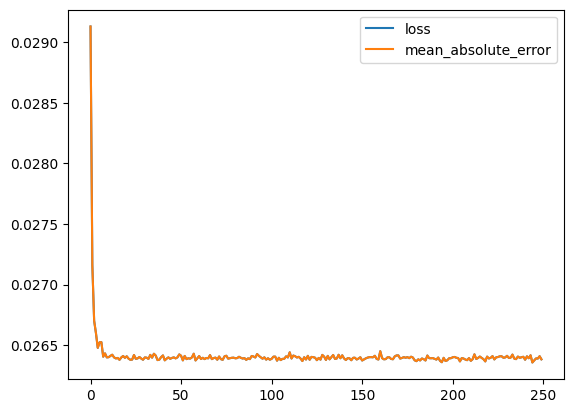

In [65]:
# visualise only training
pd.DataFrame(history_4.history).plot()

# Submission

In [66]:
# Make predictions on the test set
preds = model_4.predict(tf.expand_dims(final_X_test, axis=-1))
preds , len(preds) , preds.shape




87/87 [==============================] - 0s 2ms/step


(array([[0.03688435],
        [0.03688435],
        [0.03688435],
        ...,
        [0.03688435],
        [0.03688435],
        [0.03688435]], dtype=float32),
 2783,
 (2783, 1))

In [67]:
import numpy as np

# Step 5: Unnormalize the predictions
unnormalized_preds = scaler.inverse_transform(preds)

# Convert to 1D array if necessary
unnormalized_preds = np.squeeze(unnormalized_preds)

# Round the values to 1 decimal place
unnormalized_preds_rounded = np.round(unnormalized_preds, 1)

# Display the unnormalized and rounded predictions
unnormalized_preds_rounded, unnormalized_preds_rounded.shape


(array([18., 18., 18., ..., 18., 18., 18.], dtype=float32), (2783,))

In [68]:
# Create submission file
sub = pd.DataFrame({'id': test_df['id'], 'pm2_5': unnormalized_preds_rounded})

# Preview sub file
sub

,id,pm2_5
date,,
2023-09-06,id_ihxgrbq8bw,18.0
2023-09-07,id_dg6s4fhiwe,18.0
2023-09-08,id_f7hwwtmuzp,18.0
2023-09-09,id_ioese5awdg,18.0
2023-09-20,id_hdw320zpls,18.0
...,...,...
2024-01-27,id_5yblexf7zp,18.0
2024-02-21,id_c9cycuvetl,18.0
2024-02-22,id_8xu1ardxni,18.0


In [69]:
# Create a csv file
sub.to_csv('submission.csv', index = False)